# Customer Churn Prediction in Python

### Import Relevant Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Dataset

In [2]:
cus_data = pd.read_csv("CHURN.csv")
cus_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
cus_data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
cus_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
cus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
to_change = list(cus_data[cus_data['TotalCharges'] == ' '].index)
to_change

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [7]:
for i in to_change:
    cus_data.loc[i,'TotalCharges'] = 0

In [8]:
cus_data[cus_data['TotalCharges'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [9]:
cus_data[['TotalCharges']] = cus_data[['TotalCharges']].astype(float)

In [10]:
cus_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Some Insights

In [11]:
churn = cus_data.groupby('Churn')
churn.mean()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
Churn,,,,
No,0.128721,37.569965,61.265124,2549.911442
Yes,0.254682,17.979133,74.441332,1531.796094


In [12]:
cus_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Text(0, 0.5, 'Number of Customers')

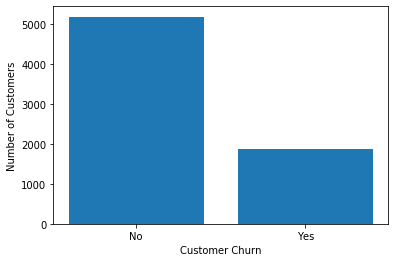

In [13]:
churned = cus_data.groupby('Churn').count()
plt.bar(churned.index.values, churned['PaymentMethod'])
plt.xlabel("Customer Churn")
plt.ylabel("Number of Customers")

Text(0, 0.5, 'Number of Customers')

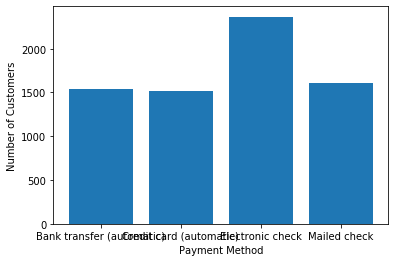

In [14]:
pay_method = cus_data.groupby("PaymentMethod").count()
plt.bar(pay_method.index.values, pay_method['MonthlyCharges'])
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")

In [15]:
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


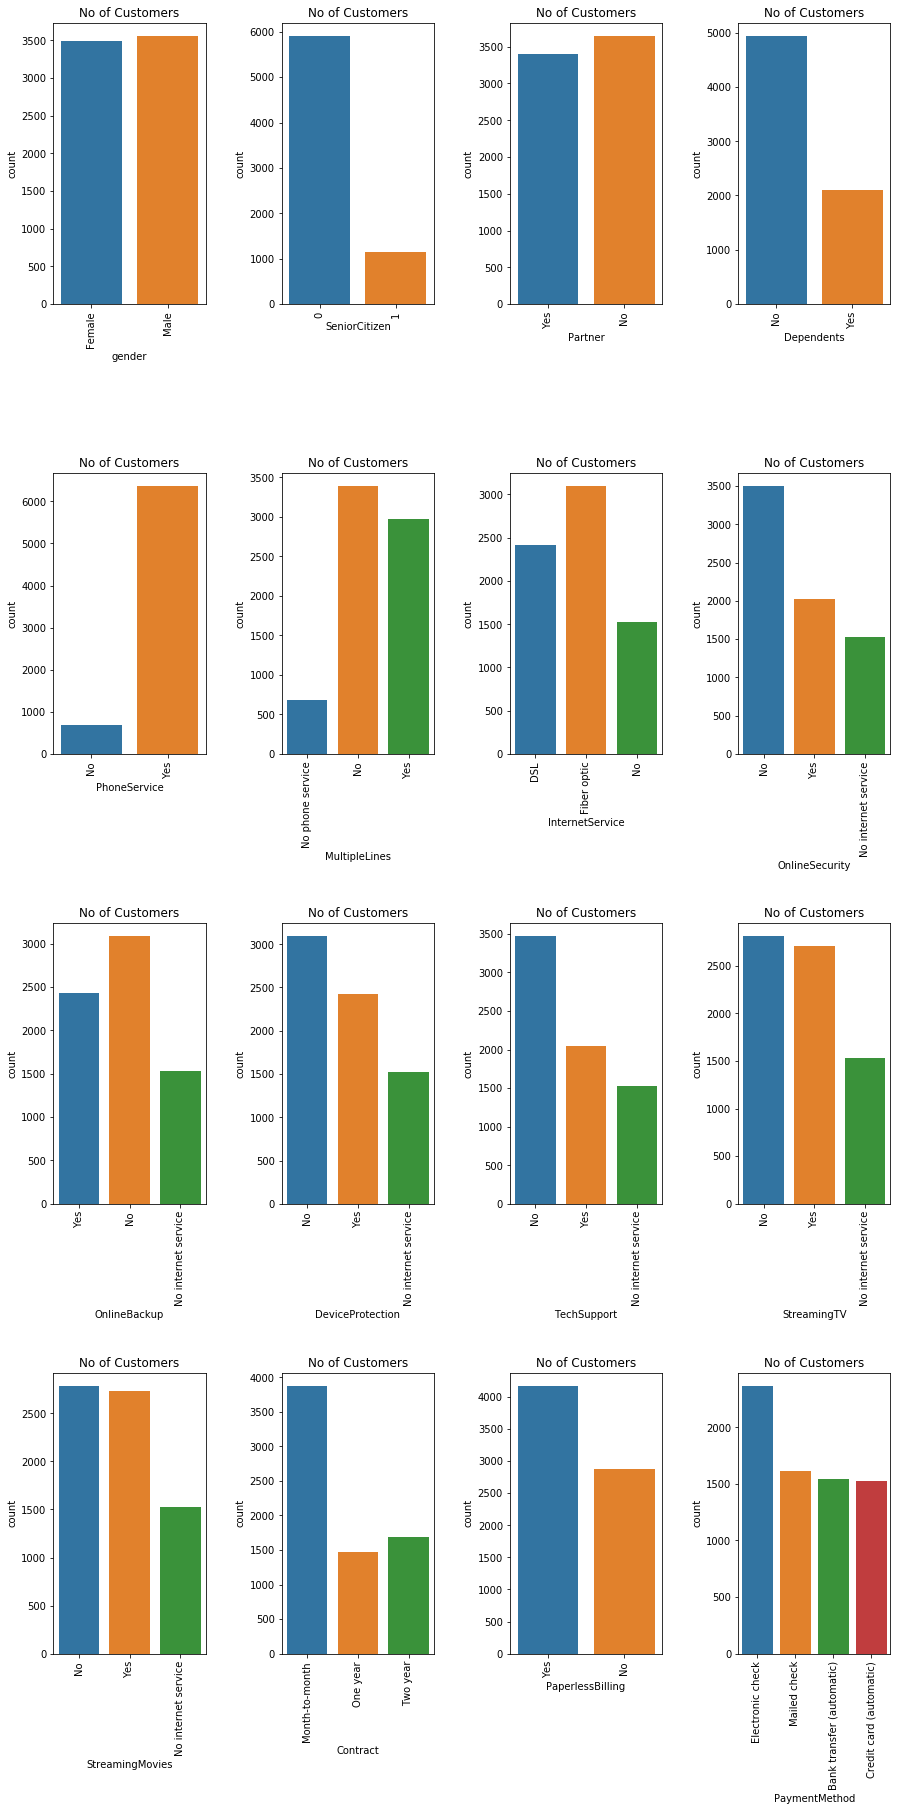

In [16]:
fig = plt.subplots(figsize=(15,30))
for i, j in enumerate(cat_features):
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(hspace=0.6, wspace=0.5)
    sns.countplot(x=j, data = cus_data)
    plt.xticks(rotation=90)
    plt.title("No of Customers")

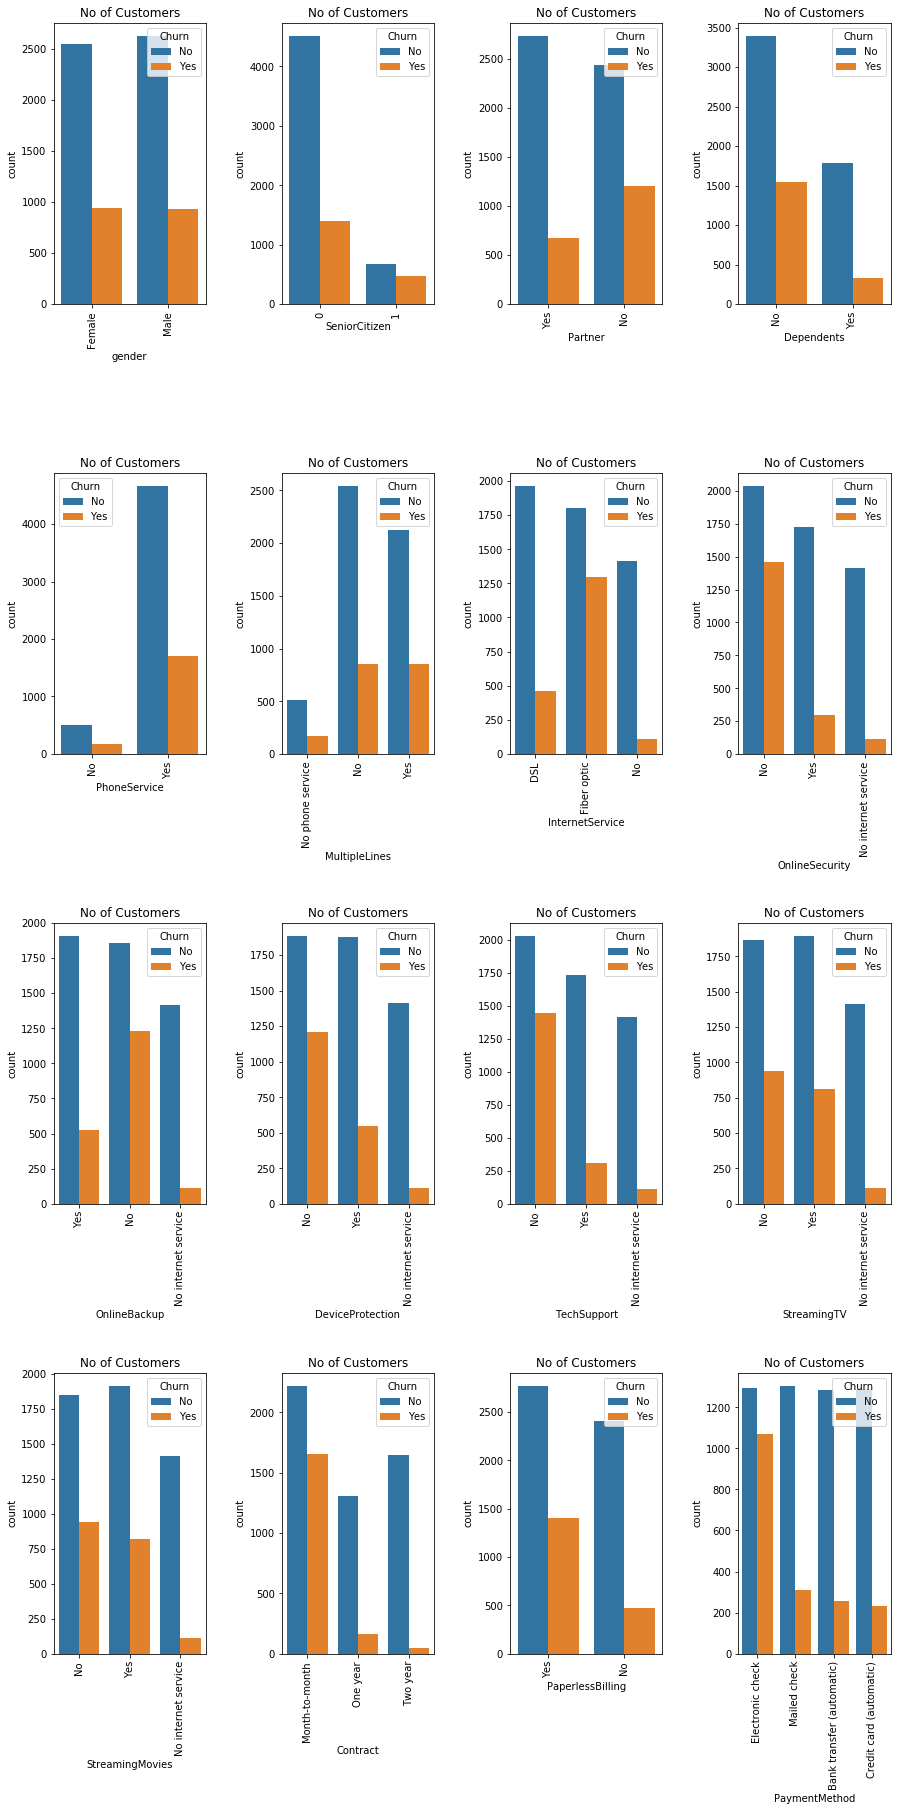

In [17]:
fig = plt.subplots(figsize=(15,30))
for i, j in enumerate(cat_features):
    plt.subplot(4,4,i+1)
    plt.subplots_adjust(hspace=0.6, wspace=0.5)
    sns.countplot(x=j, data = cus_data, hue='Churn')
    plt.xticks(rotation=90)
    plt.title("No of Customers")

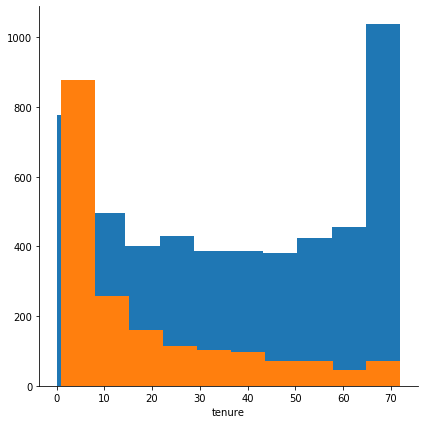

In [18]:
facet = sns.FacetGrid(cus_data, height=6, hue='Churn')
facet = facet.map(plt.hist, 'tenure')

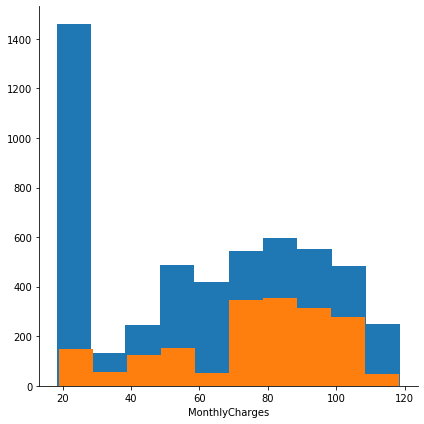

In [19]:
facet = sns.FacetGrid(cus_data, height=6, hue='Churn')
facet = facet.map(plt.hist, 'MonthlyCharges')

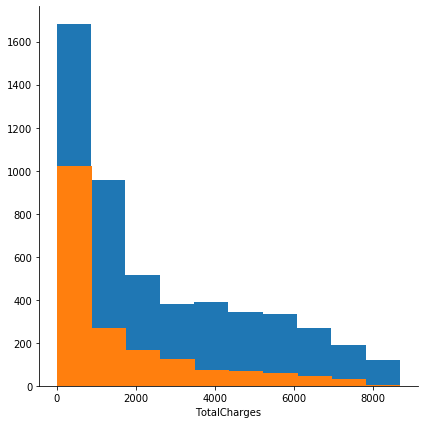

In [20]:
facet = sns.FacetGrid(cus_data, height=6, hue='Churn')
facet = facet.map(plt.hist, 'TotalCharges')

## Label Encoding

In [21]:
cus_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
enc_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']



In [23]:
# Import label Encoder
from sklearn import preprocessing

# creating label encoder
encoder = preprocessing.LabelEncoder()

# converting string labels into numbers
for i in enc_features:
    cus_data[i] = encoder.fit_transform(cus_data[i])

In [39]:
cus_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


## Cluster Analysis

In [42]:
# import module
from sklearn.cluster import KMeans

# Filter the data
churn_cluster = cus_data[['OnlineSecurity', 'TechSupport']][cus_data.Churn == 1]

# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3).fit(churn_cluster)


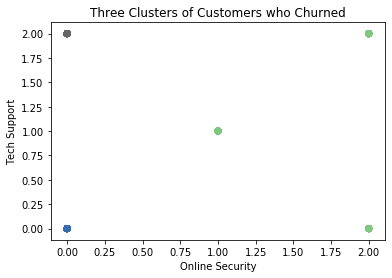

In [43]:
# Add a new column "labels" and assign cluster labels to it
churn_cluster['label'] = kmeans.labels_

# Draw a scatter plot
plt.scatter(churn_cluster['OnlineSecurity'], churn_cluster['TechSupport'], c=churn_cluster['label'], cmap='Accent')
plt.xlabel("Online Security")
plt.ylabel("Tech Support")
plt.title("Three Clusters of Customers who Churned")
plt.show()

## Building a Prediction Model

In [33]:
# Selecting our X and y values
X = cus_data[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]

y = cus_data['Churn']

In [34]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

# split the dataset into train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Model Building

In [36]:
# import gradient boosting classifier model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


# Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()
lr = LogisticRegression()

#train the model using the training sets
lr.fit(X_train, y_train)

# predict the response for the test dataset
y_pred = lr.predict(X_test)

/Users/user/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [37]:
# import scikit-learn metric module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier corrent
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))

# Model predision.
print("Precision Score:", metrics.precision_score(y_test, y_pred))

# Model Recall Score
print("Recall Score:", metrics.recall_score(y_test, y_pred))

Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
